In [549]:
%run Movies-data-organize-cleaning.ipynb
%run EDA_visualization.ipynb
%run Movies-Supervised_learning.ipynb

# Introduction

### About Us:
We are Raziel Shushan and Rom Basson, second year computer science students at HIT College.
Our project is in a data science course taught by Dr. Jonathan Scheller.

### What is the project about?
In the project we are trying to understand whether it is possible to predict revenue for a film that was screened in the cinema based on data from several sources of information.
Calculation of income per film = income in the country of origin + income from countries to which the film was distributed.

### Why did we choose this project?
Cinema for us is not just a movie and popcorn.
It's watching the movie page on IMDB, reading reviews and of course lots of talk before watching the movie itself.
Therefore, it was natural to choose this subject especially after the Corona period when cinemas in Israel were shut down and the lack was felt so much.

### A little about the code:
You can view the source code at GitHab on the following link - https://github.com/RazielShushan/data_science_hit_project.git
In this notebook we will use the functions we built in the other notebooks according to the steps in the project, you can view the full code in the notebooks:
-	<a href="./Scraping_movies.ipynb">Scraping_movies.ipynb</a> – Scraping information for the movies
-	<a href="./Scraping_movie_list.ipynb">Scraping_movie_list.ipynb</a> - Scraping the movie list from wildaboutmovies.com
-	<a href="./Request_utils.ipynb">Request_utils.ipynb</a>  - Notebook with utils functions
-	<a href="./Movies-data-organize-cleaning.ipynb">Movies-data-organize-cleaning.ipynb</a> - Notebook with auxiliary functions for organizing and cleaning the DATASET
-	<a href="./EDA_visualization.ipynb">EDA_visualization.ipynb</a> – Notebook with basic and advanced visualization functions
-	<a href="./Movies-Supervised_learning.ipynb">Movies-Supervised_learning.ipynb</a> – Notebook with machine learning functions



# Step 1 - Scrape the data
### About the data:
When we approached the project, we realized that there is a difficulty in separating within the Box office site (an IMDB site that displays revenue data) between films that were distributed for broadcast on DVD, Netflix, Amazon Prime, etc' and films that featured in cinemas.

Therefore, we used two different sources of information –

1.	https://www.wildaboutmovies.com/  -  A site that lists the movies screened in the United States from 2007 to 2021. 
2.	http://boxofficemojo.com/ - A site that shows the revenue data for movies and much more information.

### Dataset Retrieval Process:

We performed the data scraping process with the help of Beautiful soup, the retrieval on the first site was quick because all that was required was to index all the links on the home page that refer to the list of films by year and save the relevant data ( "movie name" and "year of release"). In total We retrieved 6398 movies and the process took several hours. (A small anecdote: when making the scraping on the site apparently the load of requests collapsed the site for a few hours and then the IP address we accessed was blocked, of course there was no difficulty in bypassing this block by connecting to VPN)

The second step, on the other hand, was more complex, because we had to simulate a movie search on the site and verify that we found a movie that matched the relevant details (movie and release year match).

The scraping process took several days due to the number of requests. (We did not execute a parallel run so as not to be blocked)

In total we were able to export data on about 5400 movies, the rest of the movies were not found in the database, we performed a manual search sample and indeed we did not find these movies on the destination site.

We decided to pull out almost all the existing information about the film because we did not yet know what data we would use and where there are correlations between the various data so the table contains about 31 columns that contain a lot of information about the film.

<table class=MsoNormalTable border=0 cellspacing=0 cellpadding=0 width=726
 style='width:544.75pt;border-collapse:collapse'>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  background:#E7E6E6;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>&nbsp;</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border:solid windowtext 1.0pt;
  border-left:none;background:#E7E6E6;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><b><span
  lang=en-IL style='color:black'>Column Name</span></b></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border:solid windowtext 1.0pt;
  border-left:none;background:#E7E6E6;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><b><span
  lang=en-IL style='color:black'>Description</span></b></p>
  </td>
  <td width=32 nowrap valign=bottom style='width:23.65pt;border:solid windowtext 1.0pt;
  border-left:none;background:#E7E6E6;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><b><span
  lang=en-IL style='color:black'>&nbsp;</span></b></p>
  </td>
  <td width=193 nowrap valign=bottom style='width:144.65pt;border:solid windowtext 1.0pt;
  border-left:none;background:#E7E6E6;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><b><span
  lang=en-IL style='color:black'>Column Name</span></b></p>
  </td>
  <td width=180 nowrap valign=bottom style='width:134.8pt;border:solid windowtext 1.0pt;
  border-left:none;background:#E7E6E6;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><b><span
  lang=en-IL style='color:black'>Description</span></b></p>
  </td>
 </tr>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>1</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>movie_name</span></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>The name of the film</span></p>
  </td>
  <td width=32 nowrap valign=bottom style='width:23.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>17</span></p>
  </td>
  <td width=193 nowrap valign=bottom style='width:144.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>producer_names</span></p>
  </td>
  <td width=180 nowrap valign=bottom style='width:134.8pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>The names of the producers</span></p>
  </td>
 </tr>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>2</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>movie_link</span></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Link the movie page on the Box Office website</span></p>
  </td>
  <td width=32 nowrap valign=bottom style='width:23.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>18</span></p>
  </td>
  <td width=193 nowrap valign=bottom style='width:144.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>producer_sum</span></p>
  </td>
  <td width=180 nowrap valign=bottom style='width:134.8pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Total producers</span></p>
  </td>
 </tr>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>3</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>year</span></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Year of release of the film</span></p>
  </td>
  <td width=32 nowrap valign=bottom style='width:23.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>19</span></p>
  </td>
  <td width=193 nowrap valign=bottom style='width:144.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>composer_names</span></p>
  </td>
  <td width=180 nowrap valign=bottom style='width:134.8pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>The names of the composers</span></p>
  </td>
 </tr>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>4</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>description</span></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Movie description</span></p>
  </td>
  <td width=32 nowrap valign=bottom style='width:23.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>20</span></p>
  </td>
  <td width=193 nowrap valign=bottom style='width:144.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>composer_sum</span></p>
  </td>
  <td width=180 nowrap valign=bottom style='width:134.8pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Total composers</span></p>
  </td>
 </tr>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>5</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>genres</span></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>The genres</span></p>
  </td>
  <td width=32 nowrap valign=bottom style='width:23.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>21</span></p>
  </td>
  <td width=193 nowrap valign=bottom style='width:144.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>cinematographer_names</span></p>
  </td>
  <td width=180 nowrap valign=bottom style='width:134.8pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>The names of the photographers</span></p>
  </td>
 </tr>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>6</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>running_time</span></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Movie time</span></p>
  </td>
  <td width=32 nowrap valign=bottom style='width:23.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>22</span></p>
  </td>
  <td width=193 nowrap valign=bottom style='width:144.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>cinematographer_sum</span></p>
  </td>
  <td width=180 nowrap valign=bottom style='width:134.8pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Total photographers</span></p>
  </td>
 </tr>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>7</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>earliest_release_date</span></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Date of release of the film</span></p>
  </td>
  <td width=32 nowrap valign=bottom style='width:23.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>23</span></p>
  </td>
  <td width=193 nowrap valign=bottom style='width:144.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>editor_names</span></p>
  </td>
  <td width=180 nowrap valign=bottom style='width:134.8pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Names of editors</span></p>
  </td>
 </tr>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>8</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>mpaa</span></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Viewing classification</span></p>
  </td>
  <td width=32 nowrap valign=bottom style='width:23.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>24</span></p>
  </td>
  <td width=193 nowrap valign=bottom style='width:144.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>editor_sum</span></p>
  </td>
  <td width=180 nowrap valign=bottom style='width:134.8pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Total editors</span></p>
  </td>
 </tr>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>9</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>budget</span></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Movie budget</span></p>
  </td>
  <td width=32 nowrap valign=bottom style='width:23.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>25</span></p>
  </td>
  <td width=193 nowrap valign=bottom style='width:144.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>production_designer_names</span></p>
  </td>
  <td width=180 nowrap valign=bottom style='width:134.8pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Names of production designers</span></p>
  </td>
 </tr>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>10</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>preformence</span></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>The performance of the film is divided into each
  country where the film was screened</span></p>
  </td>
  <td width=32 nowrap valign=bottom style='width:23.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>26</span></p>
  </td>
  <td width=193 nowrap valign=bottom style='width:144.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>production_designer_sum</span></p>
  </td>
  <td width=180 nowrap valign=bottom style='width:134.8pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Total production designers</span></p>
  </td>
 </tr>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>11</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>num_of_countries</span></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Total countries in which the film was screened</span></p>
  </td>
  <td width=32 nowrap valign=bottom style='width:23.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>27</span></p>
  </td>
  <td width=193 nowrap valign=bottom style='width:144.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>domestic_income</span></p>
  </td>
  <td width=180 nowrap valign=bottom style='width:134.8pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Income in the country of origin of the film</span></p>
  </td>
 </tr>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>12</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>cast</span></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Leading actors in the film</span></p>
  </td>
  <td width=32 nowrap valign=bottom style='width:23.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>28</span></p>
  </td>
  <td width=193 nowrap valign=bottom style='width:144.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>domestic_percent</span></p>
  </td>
  <td width=180 nowrap valign=bottom style='width:134.8pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Percentage of income in the country of origin of
  the film</span></p>
  </td>
 </tr>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>13</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>director_names</span></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>The names of the directors</span></p>
  </td>
  <td width=32 nowrap valign=bottom style='width:23.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>29</span></p>
  </td>
  <td width=193 nowrap valign=bottom style='width:144.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>international_income</span></p>
  </td>
  <td width=180 nowrap valign=bottom style='width:134.8pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Income from an international source (relative to
  the country of origin)</span></p>
  </td>
 </tr>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>14</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>director_sum</span></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Total directors</span></p>
  </td>
  <td width=32 nowrap valign=bottom style='width:23.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>30</span></p>
  </td>
  <td width=193 nowrap valign=bottom style='width:144.65pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>international_percent</span></p>
  </td>
  <td width=180 nowrap valign=bottom style='width:134.8pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>The percentage of income from the country of
  origin of the film from the world income</span></p>
  </td>
 </tr>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>15</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>writer_names</span></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>The names of the screenwriters</span></p>
  </td>
  <td width=32 nowrap rowspan=2 valign=bottom style='width:23.65pt;border-top:
  none;border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>31</span></p>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  dir=LTR></span><span lang=en-IL style='color:black'><span dir=LTR></span>&nbsp;</span></p>
  </td>
  <td width=193 nowrap rowspan=2 valign=bottom style='width:144.65pt;
  border-top:none;border-left:none;border-bottom:solid windowtext 1.0pt;
  border-right:solid windowtext 1.0pt;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>worldwide_income</span></p>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  dir=RTL></span><span lang=HE dir=RTL style='color:black'><span dir=RTL></span>&nbsp;</span></p>
  </td>
  <td width=180 nowrap rowspan=2 valign=bottom style='width:134.8pt;border-top:
  none;border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>Total global income&nbsp;</span></p>
  </td>
 </tr>
 <tr style='height:14.4pt'>
  <td width=29 nowrap valign=bottom style='width:22.0pt;border:solid windowtext 1.0pt;
  border-top:none;padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal align=right style='margin-bottom:0cm;text-align:right;
  line-height:normal'><span lang=en-IL style='color:black'>16</span></p>
  </td>
  <td width=143 nowrap valign=bottom style='width:107.4pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;line-height:normal'><span
  lang=en-IL style='color:black'>writer_sum</span></p>
  </td>
  <td width=150 nowrap valign=bottom style='width:112.25pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0cm 5.4pt 0cm 5.4pt;height:14.4pt'>
  <p class=MsoNormal dir=RTL style='margin-bottom:0cm;text-align:right;
  line-height:normal;direction:rtl;unicode-bidi:embed'><span lang=en-IL
  dir=LTR style='color:black'>Total screenwriters</span></p>
  </td>
 </tr>
</table>

# Step 2  - Preliminary analysis:

### Load the data:
After the scraping process we stored the dataset inside a data folder.
We will load the data and look at the top of the list.

In [510]:
df = load_csv("./data/All_movies_table.csv")
df.head()

,movie_name,movie_link,year,description,genres,running_time,earliest_release_date,mpaa,budget,preformence,...,cinematographer_sum,editor_names,editor_sum,production_designer_names,production_designer_sum,domestic_income,domestic_percent,international_income,international_percent,worldwide_income
0,My Life Directed,https://www.boxofficemojo.com/title/tt4029998/...,2015,"Liv Corfixen documents her husband, filmmaker ...",Documentary,58.0,27/02/2015,PG-13,NaN,"[['Domestic', 'Feb 27, 2015', '\n \n ...",...,1.0,Cathrine Ambus,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,Superpower Dogs,https://www.boxofficemojo.com/title/tt5629084/...,2019,Discover the life-saving superpowers and extra...,Documentary,47.0,29/08/2019,G,NaN,"[['United Kingdom', 'Oct 23, 2020', '$224', '$...",...,1.0,NaN,0.0,NaN,0.0,NaN,NaN,32853.0,100%,32853.0
2,A Beautiful Planet,https://www.boxofficemojo.com/title/tt2800050/...,2016,An exploration of Earth and beyond as seen fro...,Documentary,46.0,29/04/2016,NaN,NaN,"[['Domestic', 'Apr 29, 2016', '$223,983', '$15...",...,1.0,Toni Myers,1.0,NaN,0.0,15650615.0,60.80%,10079505.0,39.20%,25730120.0
3,Hubble,https://www.boxofficemojo.com/title/tt1433813/...,2010,An IMAX 3D camera chronicles the effort of 7 a...,Documentary|Short,45.0,19/03/2010,NaN,NaN,"[['Domestic', 'Mar 19, 2010', '$413,477', '$52...",...,1.0,Toni Myers,1.0,NaN,0.0,52522904.0,70.70%,21726825.0,29.30%,74249729.0
4,The Walking Deceased,https://www.boxofficemojo.com/title/tt3743822/...,2015,"A Walking Dead spinoff set in Los Angeles, Cal...",Drama|Horror|Sci-Fi|Thriller,44.0,15/04/2018,NaN,NaN,"[['Domestic', 'Apr 15, 2018', '$605,764', '$60...",...,0.0,NaN,0.0,NaN,0.0,605764.0,100%,NaN,NaN,605764.0


As we described above there are 31 columns and 6399 lines,
some of the lines are indeed empty but later it seems that most of them are full of good data 😊.

In [495]:
df.shape

(6399, 31)

At this point we use the $info$() function to get a preliminary understanding on our columns.

It can be seen that most of the columns are full of content, however, there are some columns that suffer from a great shortage such as a budget column containing 1549 rows that are just NULL!, meaning that over 70 percent of the rows are empty of this content. So unfortunately, we will not use this column.

Also, the MPAA column is missing about 40 percent, but, since we have not yet deleted rows of irrelevant rows the percentage may have dropped so at this point we will keep this column.

In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6399 entries, 0 to 6398
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_name                 6399 non-null   object 
 1   movie_link                 5493 non-null   object 
 2   year                       6399 non-null   int64  
 3   description                5485 non-null   object 
 4   genres                     5493 non-null   object 
 5   running_time               5483 non-null   float64
 6   earliest_release_date      5476 non-null   object 
 7   mpaa                       3960 non-null   object 
 8   budget                     1549 non-null   object 
 9   preformence                5484 non-null   object 
 10  num_of_countries           5484 non-null   float64
 11  cast                       5434 non-null   object 
 12  director_names             5433 non-null   object 
 13  director_sum               5434 non-null   float

### Clearing the data

Because of the above data we will delete the budget column using the auxiliary function

In [511]:
df = delete_col_by_name(df,"budget")

We will now delete double rows, in total we found 16 such rows

In [512]:
df = remove_duplicatives(df)
df.shape

(6383, 30)

We will now delete lines without critical information for further research:
- **Global income** - This is our target column and without it you cannot run models.
- **Link** - The meaning of lines without a link is that there is no data beyond the name of the film and the year of release, so these lines are worthless

After deleting we were left with 5321 lines.

In [513]:
df = delete_missing_lines(df,["movie_link","worldwide_income"])
df.shape

(5321, 30)

### Handling categorical columns
We will now deal with the Categorical columns, **genre** and **MPAA** and will transfer them to numerical columns. For **MPAA** we will use a helper function to form a categorical column on dataset.

In [514]:
df = add_categorical_column(df,'mpaa')
df[["movie_name","mpaa","mpaa_cat"]]

,movie_name,mpaa,mpaa_cat
1,Superpower Dogs,G,0
2,A Beautiful Planet,NaN,-1
3,Hubble,NaN,-1
4,The Walking Deceased,NaN,-1
5,Tornado Alley,NaN,-1
...,...,...,...
5754,Youth In Oregon,NaN,-1
5843,Mayhem,NaN,-1
5891,The Barber,NaN,-1
6178,The Hole,NaN,-1


For the genre column it is a little bit complicated because there are many genres and each movie has more than one genre, so we added a column with the value **0 or 1** that verifies if the film belongs to this genre.
We will use a helper function to divide the data into columns. The sign for separating the data to colomns is **'|'**

After the transfer we had another 21 columns.


In [515]:
df = df_division_of_data(df,"genres","|")
df.head()

,movie_name,movie_link,year,description,genres,running_time,earliest_release_date,mpaa,preformence,num_of_countries,...,Romance,Comedy,Mystery,Fantasy,Western,Musical,unknown,Sport,Animation,News
1,Superpower Dogs,https://www.boxofficemojo.com/title/tt5629084/...,2019,Discover the life-saving superpowers and extra...,Documentary,47.0,29/08/2019,G,"[['United Kingdom', 'Oct 23, 2020', '$224', '$...",3.0,...,0,0,0,0,0,0,0,0,0,0
2,A Beautiful Planet,https://www.boxofficemojo.com/title/tt2800050/...,2016,An exploration of Earth and beyond as seen fro...,Documentary,46.0,29/04/2016,NaN,"[['Domestic', 'Apr 29, 2016', '$223,983', '$15...",5.0,...,0,0,0,0,0,0,0,0,0,0
3,Hubble,https://www.boxofficemojo.com/title/tt1433813/...,2010,An IMAX 3D camera chronicles the effort of 7 a...,Documentary|Short,45.0,19/03/2010,NaN,"[['Domestic', 'Mar 19, 2010', '$413,477', '$52...",7.0,...,0,0,0,0,0,0,0,0,0,0
4,The Walking Deceased,https://www.boxofficemojo.com/title/tt3743822/...,2015,"A Walking Dead spinoff set in Los Angeles, Cal...",Drama|Horror|Sci-Fi|Thriller,44.0,15/04/2018,NaN,"[['Domestic', 'Apr 15, 2018', '$605,764', '$60...",1.0,...,0,0,0,0,0,0,0,0,0,0
5,Tornado Alley,https://www.boxofficemojo.com/title/tt1852955/...,2011,A team of storm chasers track a tornado.,Documentary|Short,43.0,29/09/2011,NaN,"[['Australia', 'Sep 29, 2011', '$69,637', '$17...",1.0,...,0,0,0,0,0,0,0,0,0,0


### Handling outliers
We will now go through the significant numeric columns and look for outliers and remove the relevant rows
It can be seen that there are anomalies in the running time column and therefore we will delete these lines (about 160 lines)

In [516]:
df.describe(include='all')

,movie_name,movie_link,year,description,genres,running_time,earliest_release_date,mpaa,preformence,num_of_countries,...,Romance,Comedy,Mystery,Fantasy,Western,Musical,unknown,Sport,Animation,News
count,5321,5321,5321.000000,5313,5321,5312.000000,5321,3860,5321,5321.000000,...,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000
unique,5281,5276,NaN,5147,945,NaN,1992,7,5154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Unstoppable,https://www.boxofficemojo.com/title/tt1790864/...,NaN,Left without men in the dying days of the Amer...,Drama,NaN,14/09/2018,R,"[['Domestic', 'Oct 18, 2013', '$923,715', '$56...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,3,NaN,3,412,NaN,15,1970,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2014.027814,NaN,NaN,104.536521,NaN,NaN,NaN,20.409509,...,0.187935,0.311971,0.100357,0.103364,0.012780,0.016162,0.001316,0.032701,0.050366,0.003007
std,NaN,NaN,3.898136,NaN,NaN,18.164725,NaN,NaN,NaN,22.127012,...,0.390697,0.463342,0.300504,0.304462,0.112333,0.126112,0.036250,0.177869,0.218721,0.054758
min,NaN,NaN,2007.000000,NaN,NaN,31.000000,NaN,NaN,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2011.000000,NaN,NaN,92.000000,NaN,NaN,NaN,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,2014.000000,NaN,NaN,102.000000,NaN,NaN,NaN,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,2018.000000,NaN,NaN,113.000000,NaN,NaN,NaN,37.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


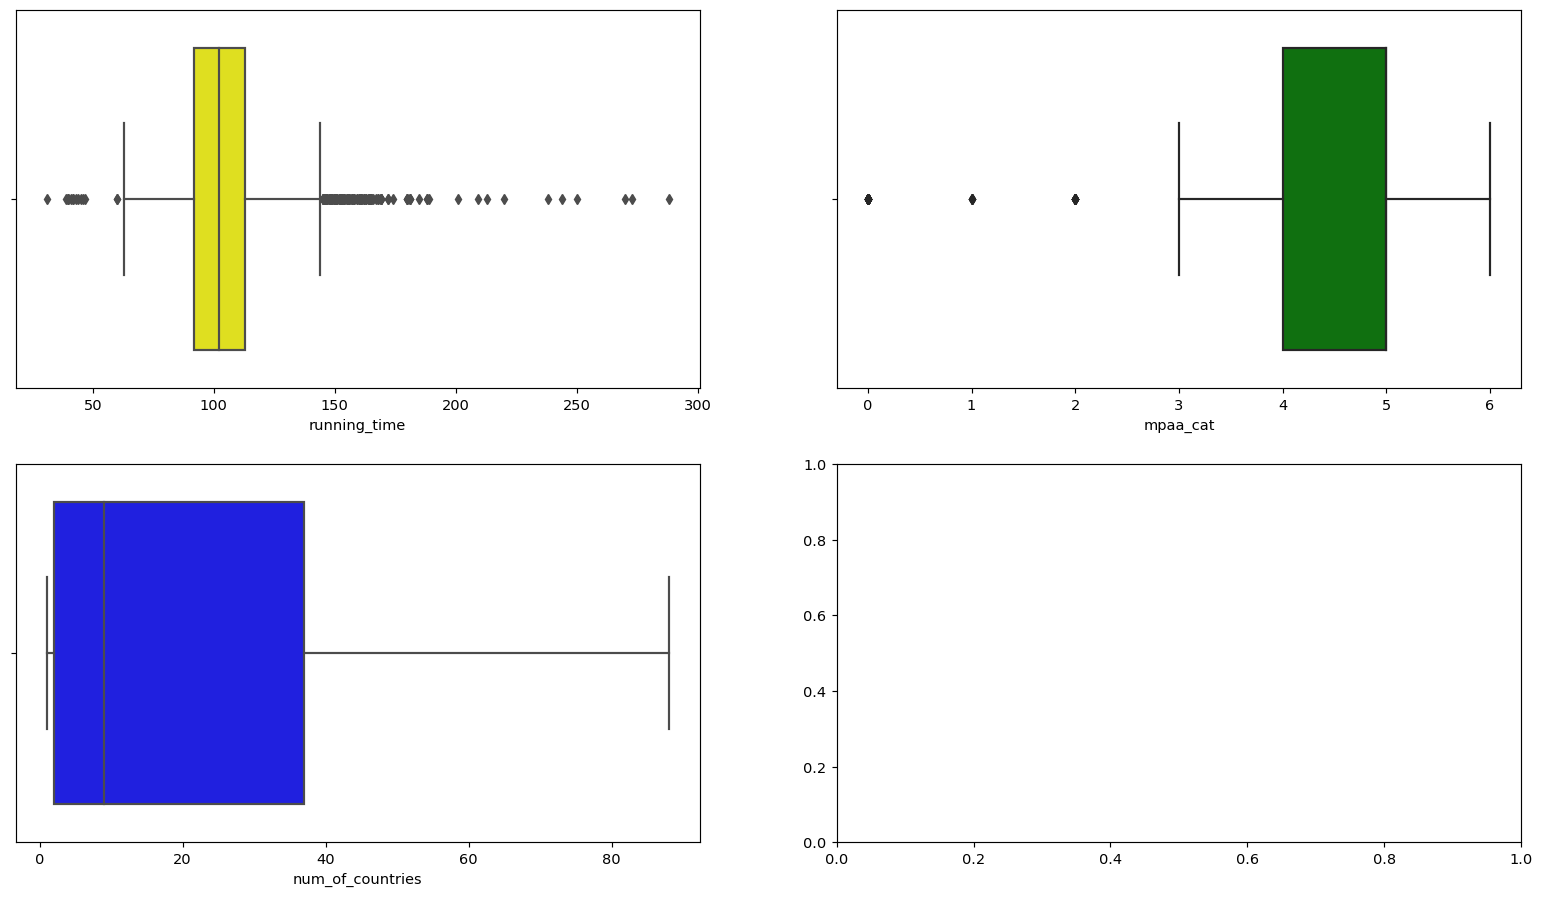

In [517]:
get_outliers(df)

In [518]:
df = remove_outliers_by_col(df,'running_time')
df.shape

(5150, 55)

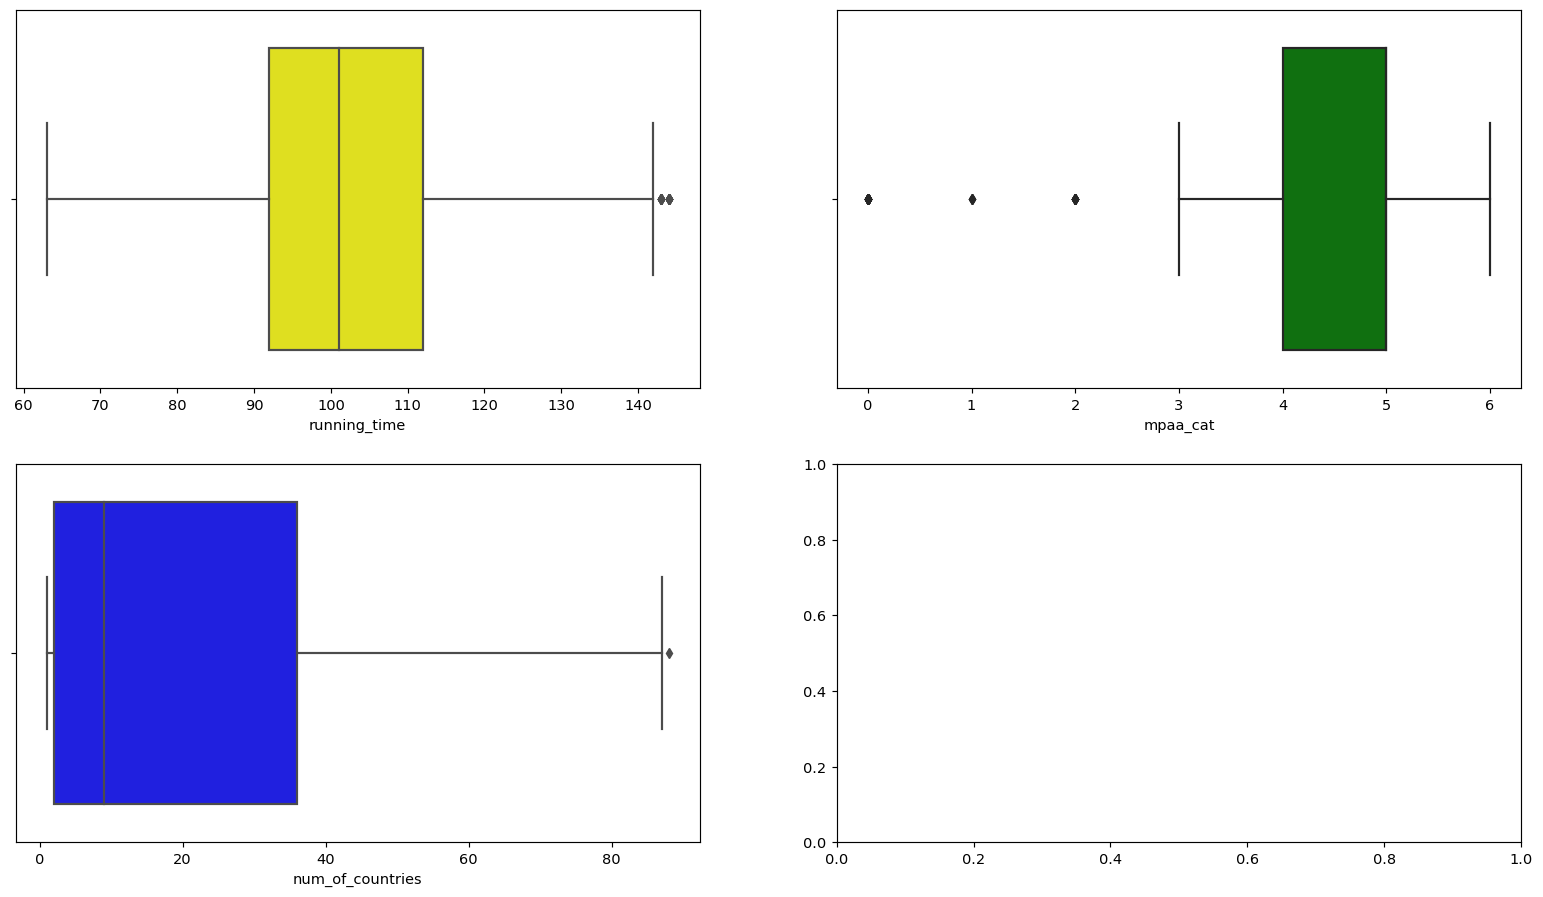

In [519]:
get_outliers(df)

# Step 3 - EDA Visualization

As known nothing better than getting a clear look at the data.<br>
We will begin with looking by years. 
</br>You can see that 2018 leads with the number of movies, while 2020 and 2021 are a lot lower.</br>
We can conclude from this that the reason is the corona epidemic leading to lower film output.


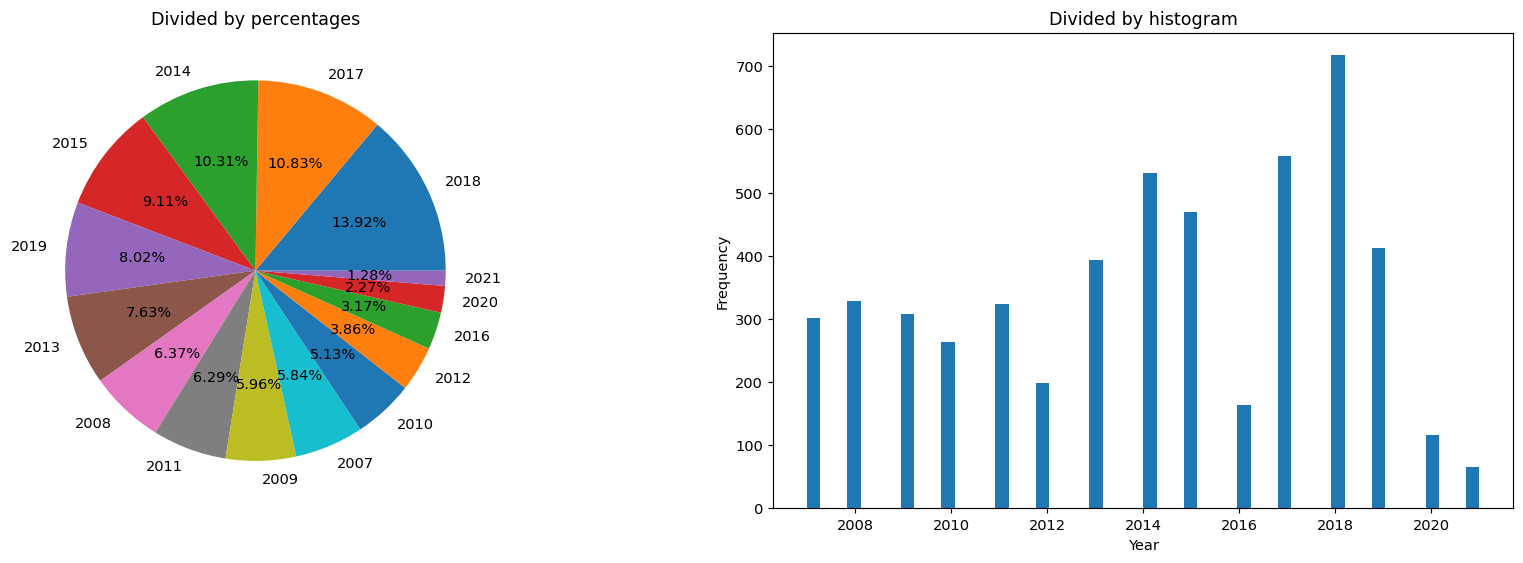

In [520]:
get_vis_division_by_year(df)

In the genre column you can see that the **drama** leads and after that **comedy**.

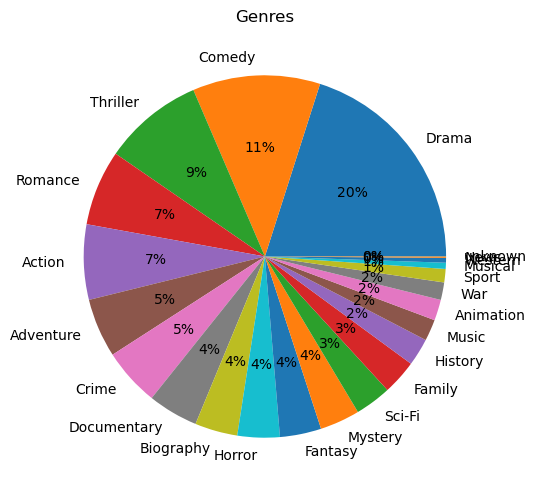

In [145]:
get_vis_division_by_genres(df)

# Correlation between columns
Now we will find columns that influence the world revenue, in other words columns that have a high correlation with the objective.

This is the rating of the correlation between worldwide income and the 9 highest columns (closer to 1)
1. international_income   -    $0.981205$              
2. domestic_income        -    $0.942356$
3. num_of_countries       -    $0.594504$
4. Adventure              -    $0.459514$
5. writer_sum             -    $0.319568$
6. Action                 -    $0.301650$
7. running_time           -    $0.267464$
8. Family                 -    $0.258684$
9. Fantasy                -    $0.238758$

### Insights:
1.	From the above data it is not surprising to note that the income columns have very high influence rates as from this data is derived the the final data. So our model will disregard this data.
2.	Since in countries where the film was played more there was more income, it is clear why there is correlation between the columns. 
3.	Interesting to see the connection between income and the genre, which means that there is a high probability that the income will increase if the film is of action or adventure, genre.
4. The connection between the amount of writers and income is a very surprising connection, if we delve deeper into studies done on it we will surely find the reason for the issue, but at the moment this issue is a mystery to us.


In [146]:
df.corr()['worldwide_income']

year               -0.023831
running_time        0.256084
num_of_countries    0.595753
director_sum        0.008494
writer_sum          0.319076
                      ...   
Musical             0.130033
unknown            -0.005500
Sport              -0.026720
Animation           0.262638
News               -0.022046
Name: worldwide_income, Length: 110, dtype: float64

Now we will present in Scaater plots the connection between each of the above 9 columns and the target columns(worldwide_income), we can see where the connection is strong compared to a weak connection, as we said before, visualization is a 'game changer' 😊

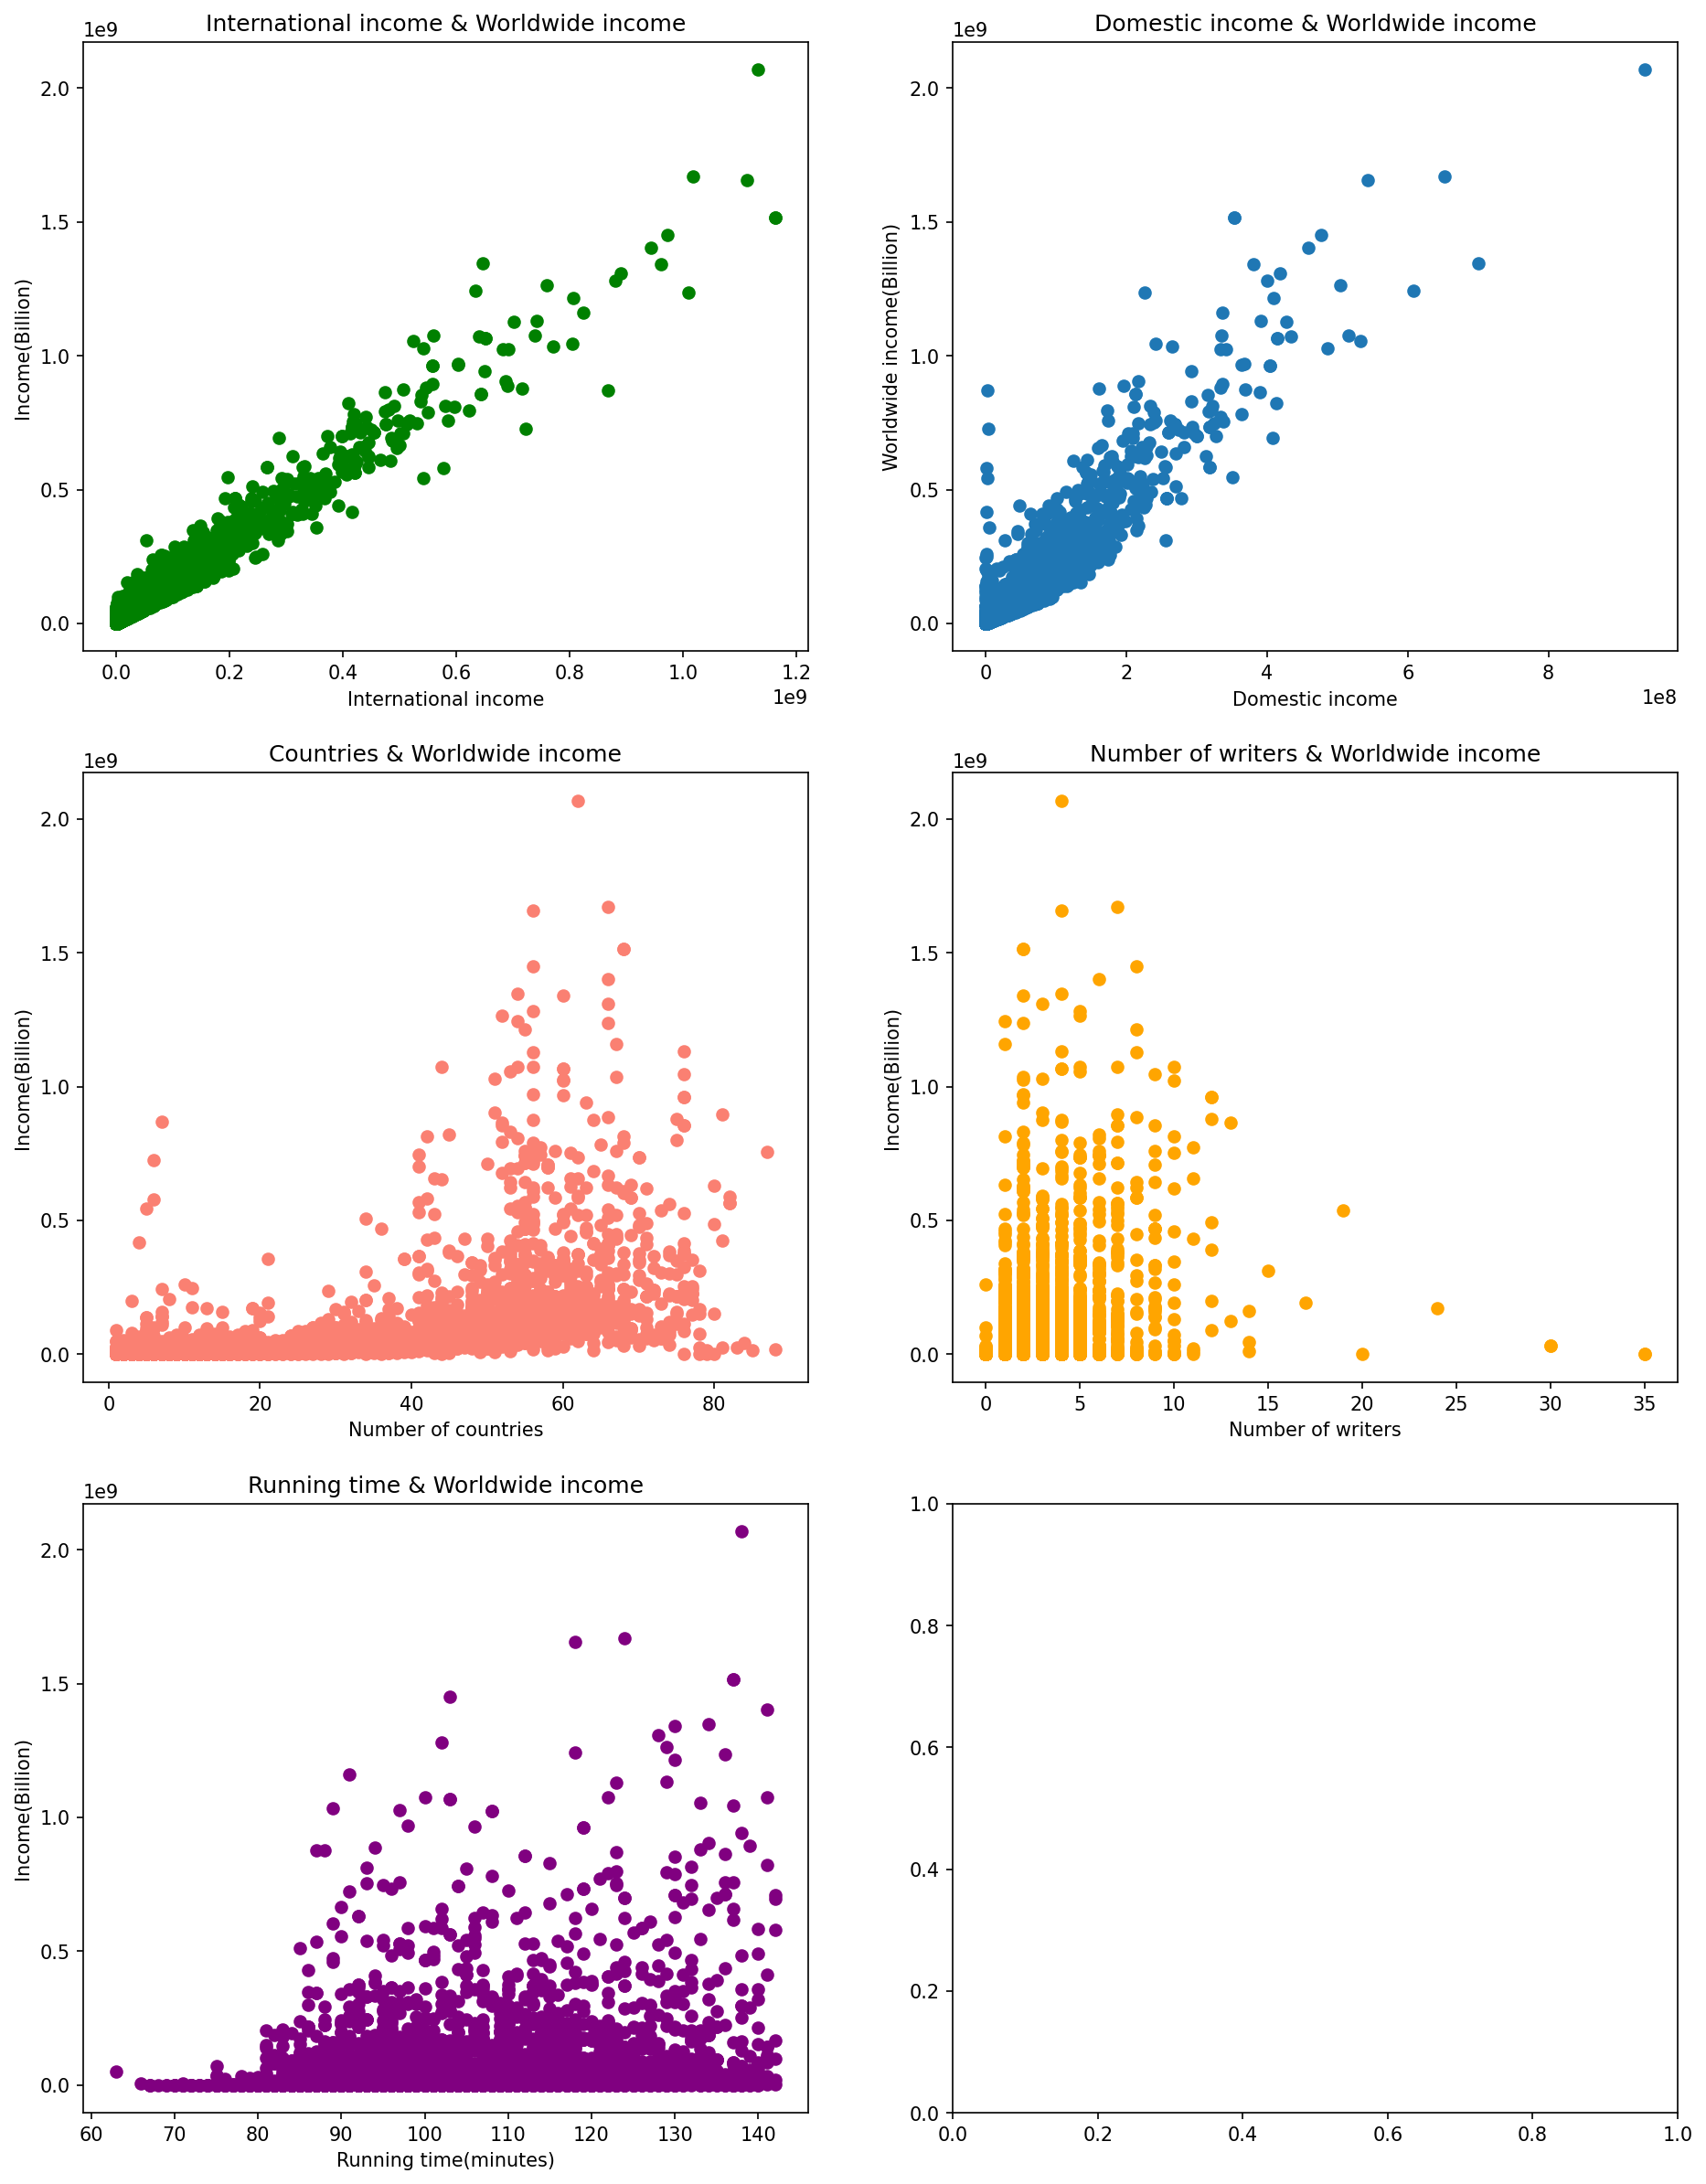

In [147]:
get_scatter_plot(df)

Following what was shown above we examined the relationship between the 9 variables above in order to find correlation with additional columns and then cross them using 3D_Scaater_plot where Z is the target column (worldwide_income)
- For running_time I did not find a strong correlation with other data
- For sum_of_country we found that there is a correlation with the columns:
| column name | corolation rate |
| --- | --- |
| mpaa | 0.357106 |
| running_time | 0.298874 |
| writer_sum | 0.307073 |

- For writer_sum we found that there is a correlation with the columns:
| column name | corolation rate |
| --- | --- |
| director_sum | 0.342248 |
| composer_sum | 0.306485 |
| editor_sum | 0.316701 |
| production_designer_sum | 0.381229 |


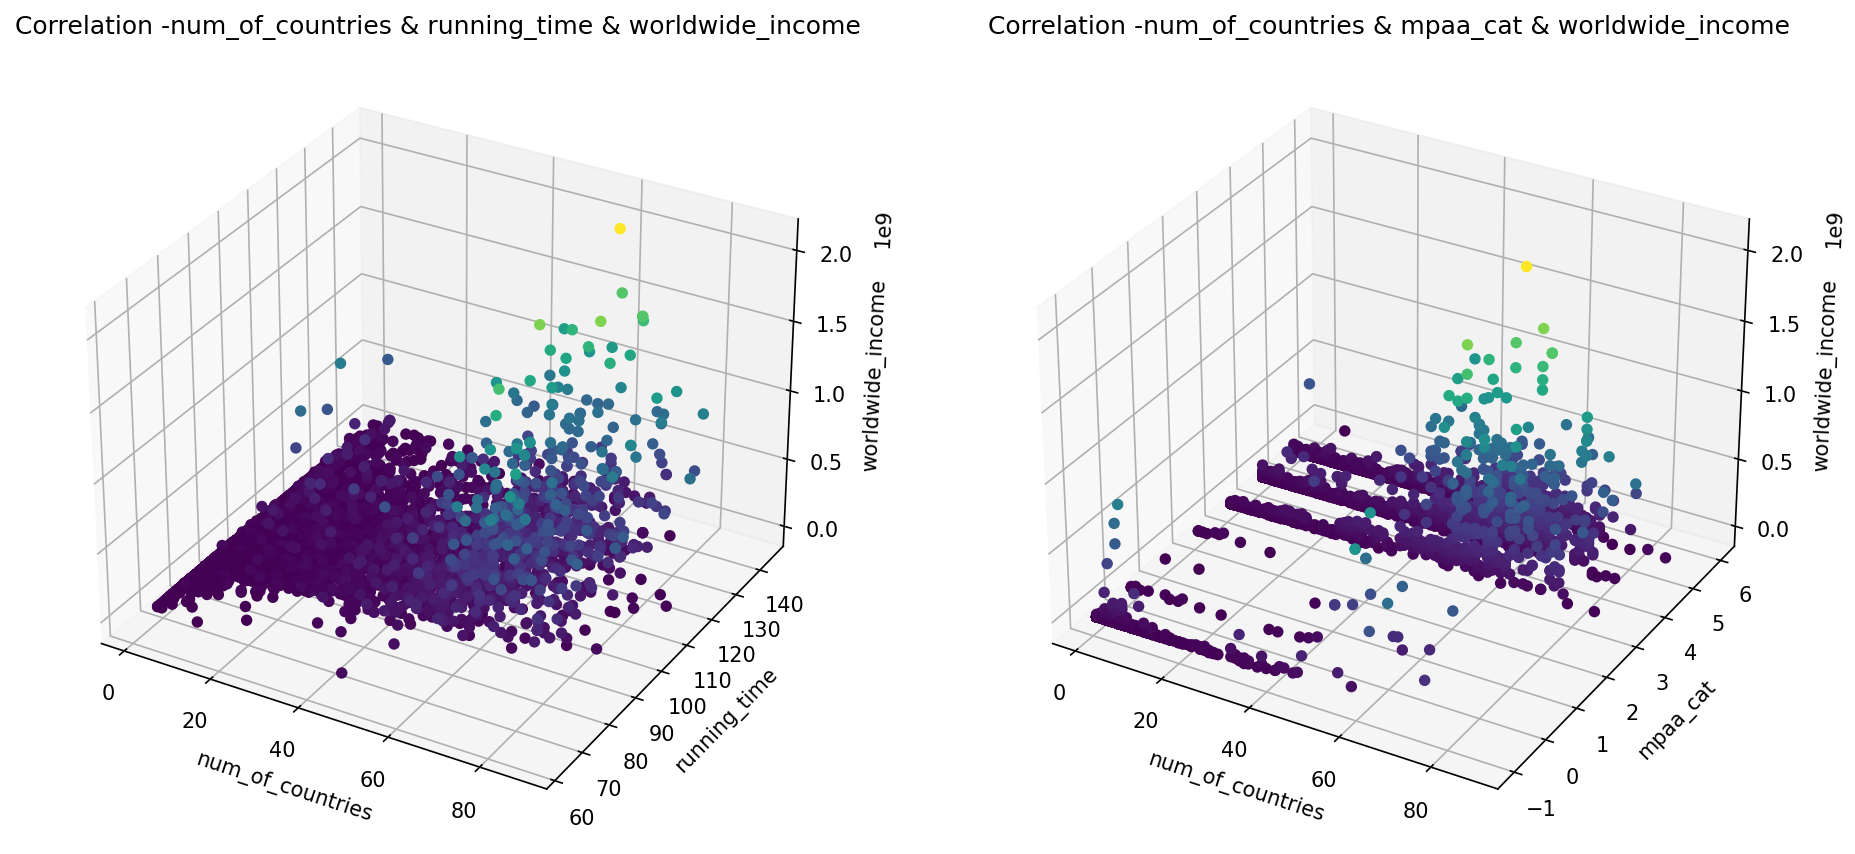

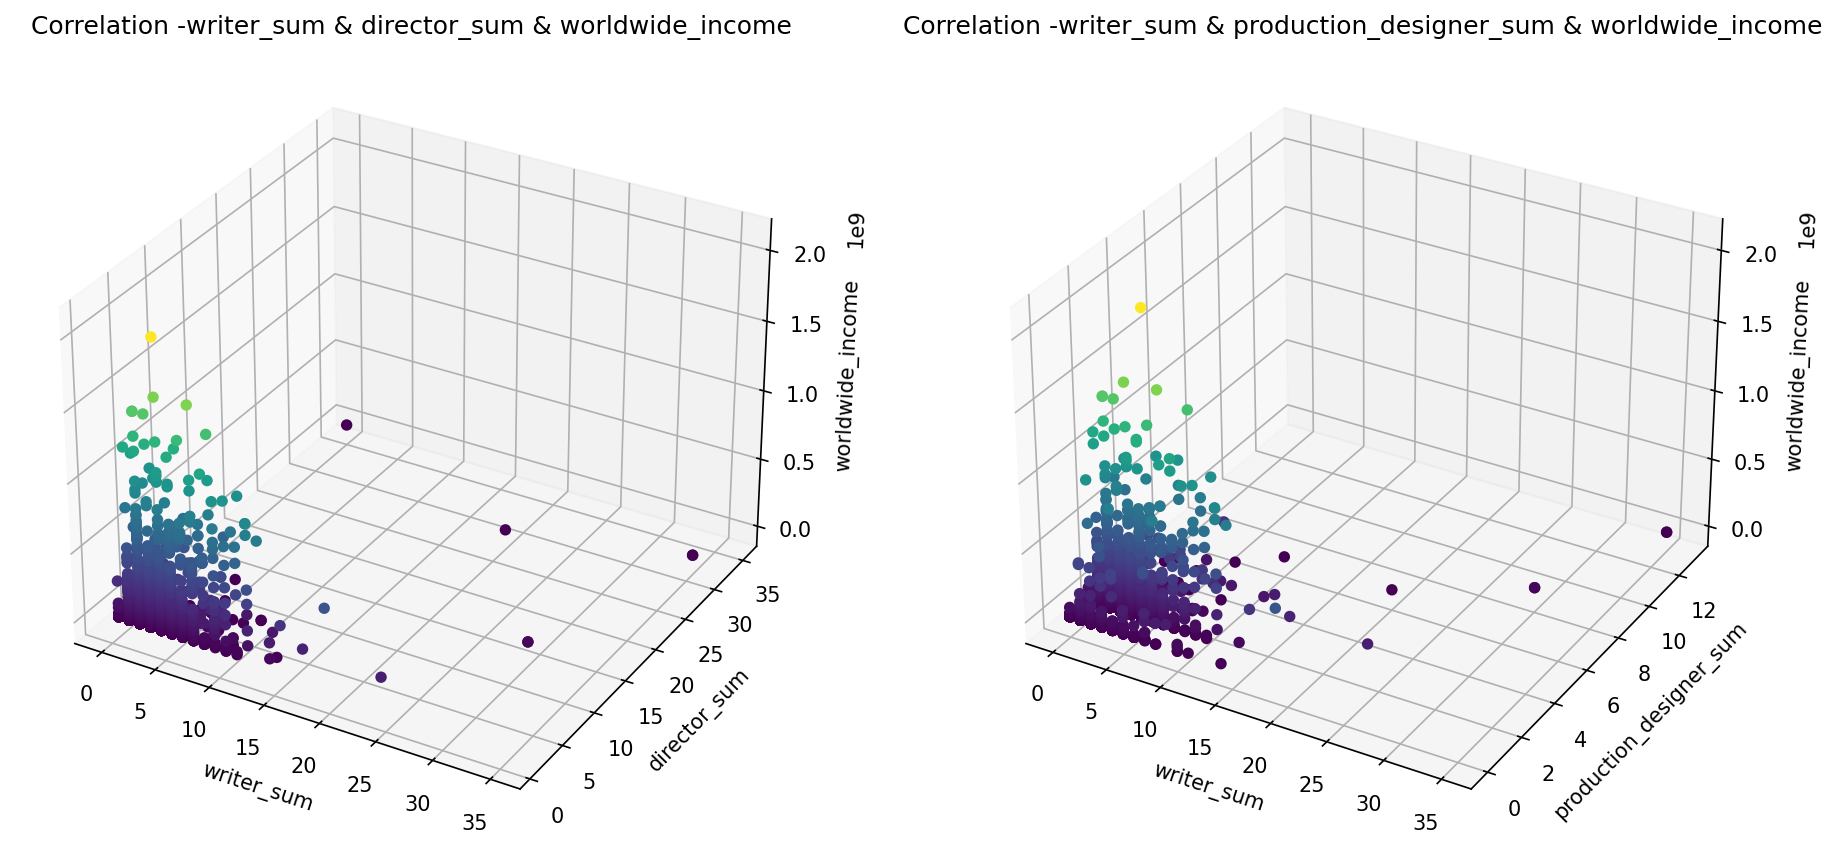

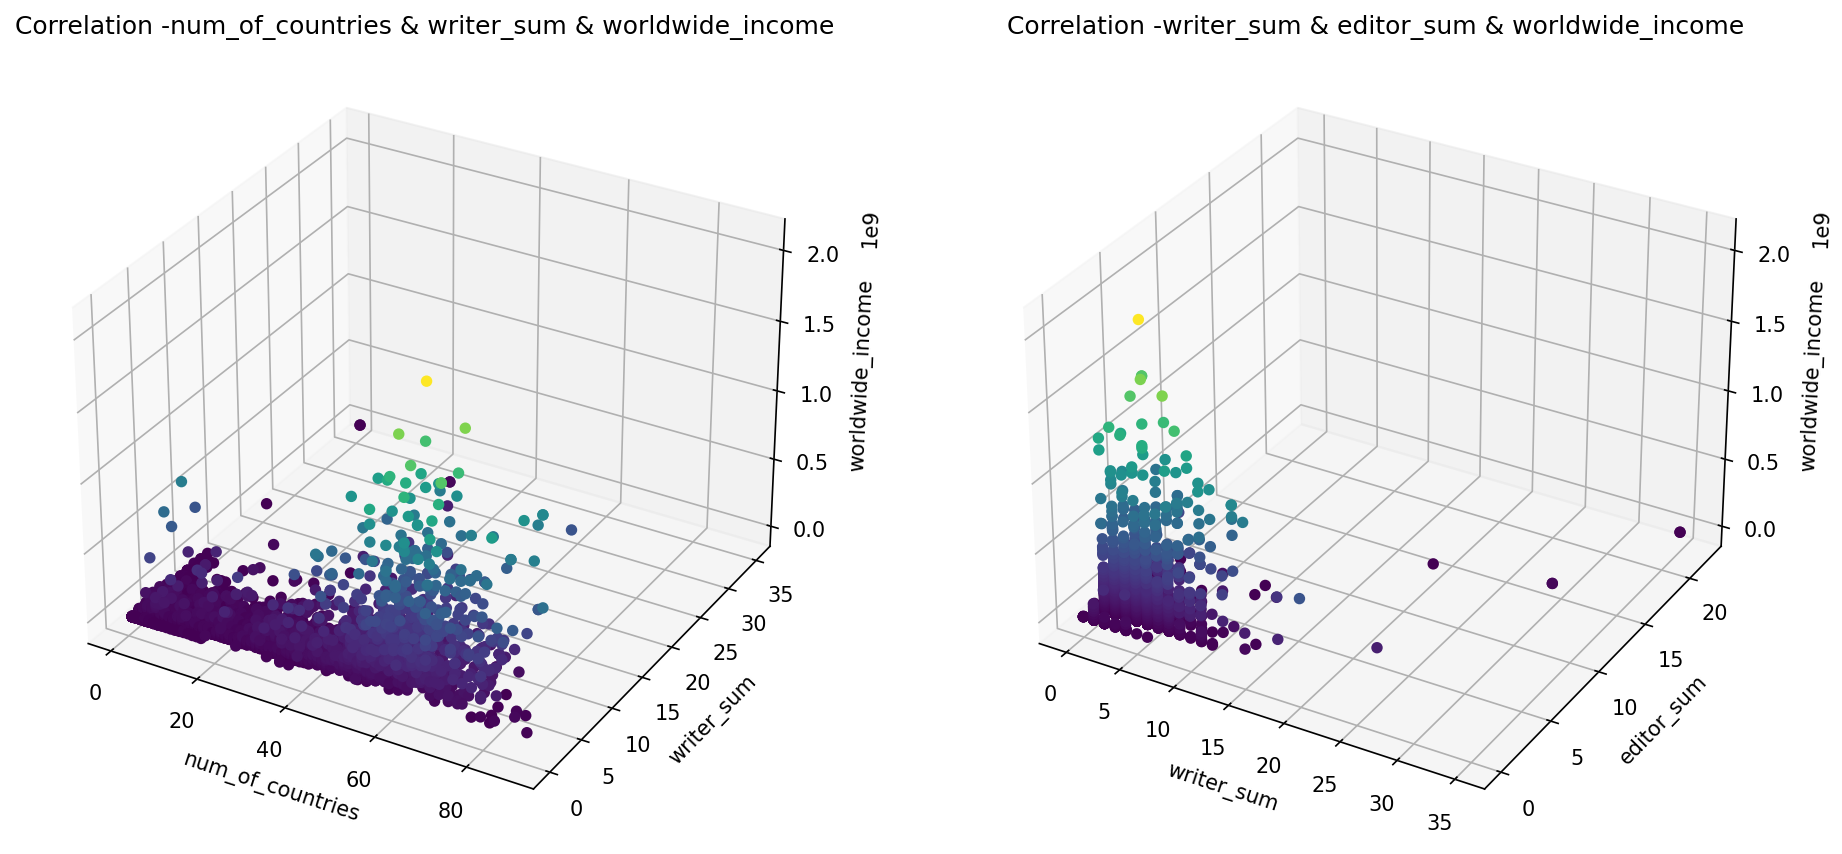

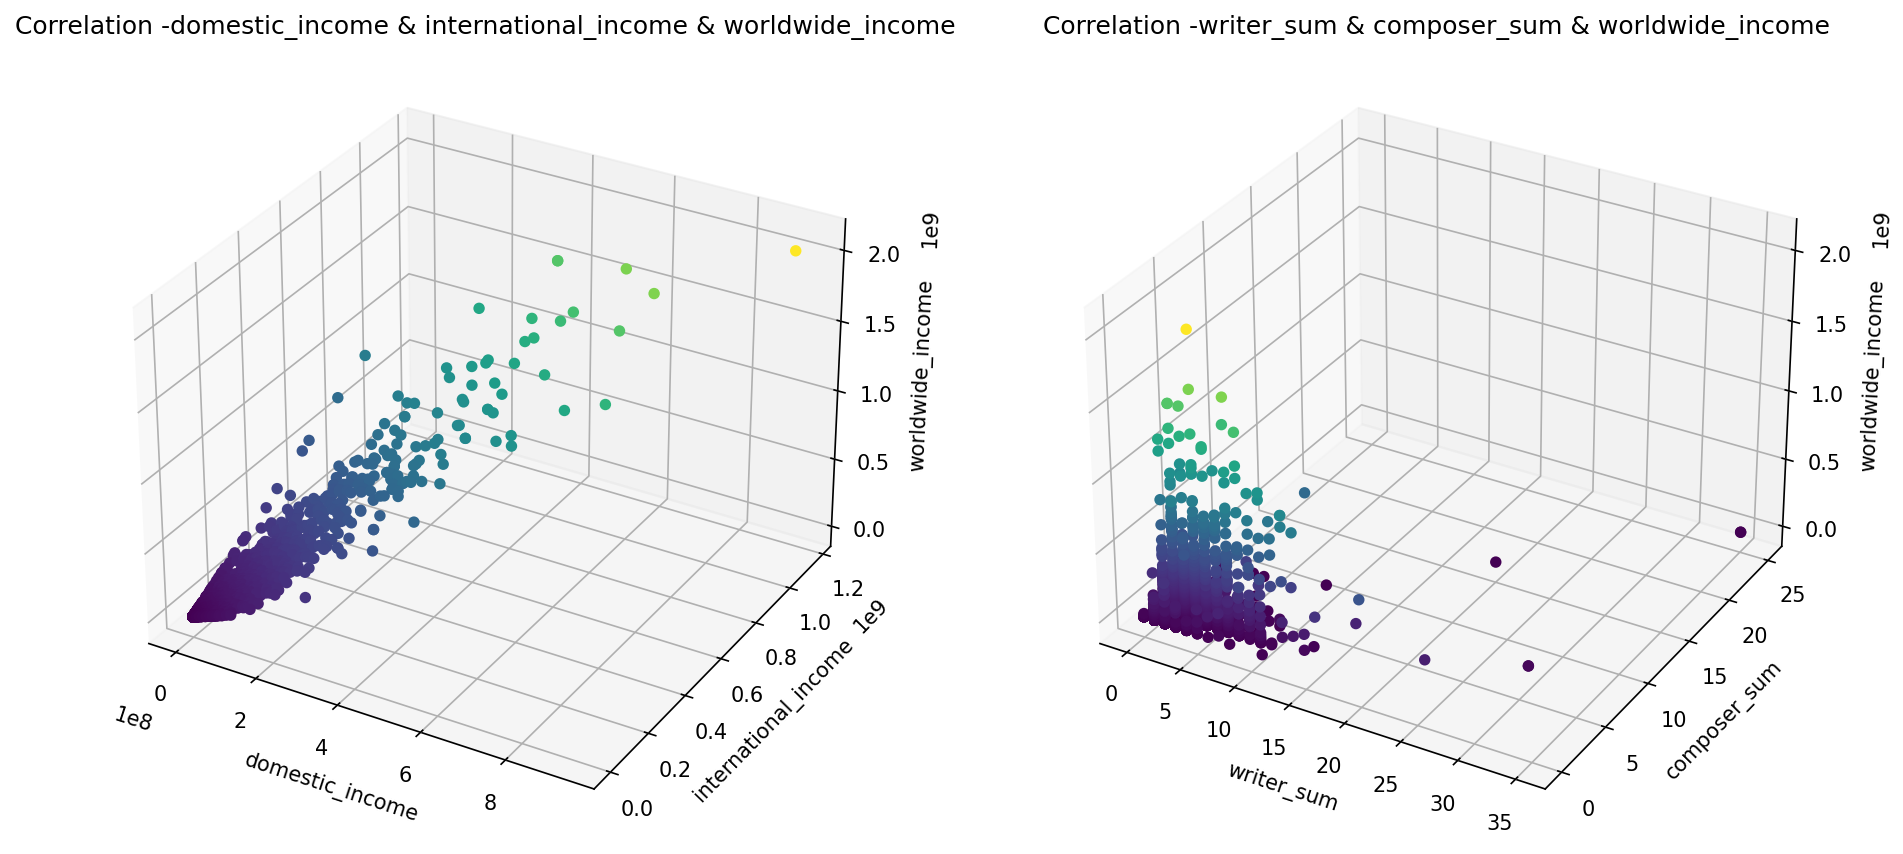

In [521]:
get_two_3D_scaater_plot(df,"num_of_countries","running_time","worldwide_income","num_of_countries","mpaa_cat","worldwide_income")
get_two_3D_scaater_plot(df,"writer_sum","director_sum","worldwide_income","writer_sum","production_designer_sum","worldwide_income")
get_two_3D_scaater_plot(df,"num_of_countries","writer_sum","worldwide_income","writer_sum","editor_sum","worldwide_income")
get_two_3D_scaater_plot(df,"domestic_income","international_income","worldwide_income","writer_sum","composer_sum","worldwide_income")

### Text Analysis:
The textual columns can not be analyzed in the same way as the numeric columns, however we will try to find certain words that recur a lot and then check the relationship between them and the income.

In the first two graphs we analyzed the **description** column, and located the 20 most common words.</br>
In the rest of the columns we only show Bar plot, in this project we will not try to predict the result with the help of these columns, nevertheless it is interesting to see the data visually.

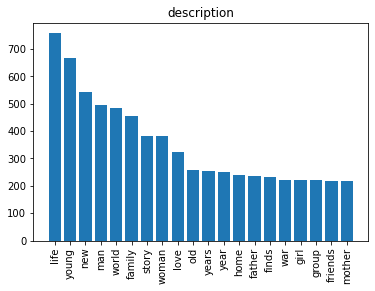

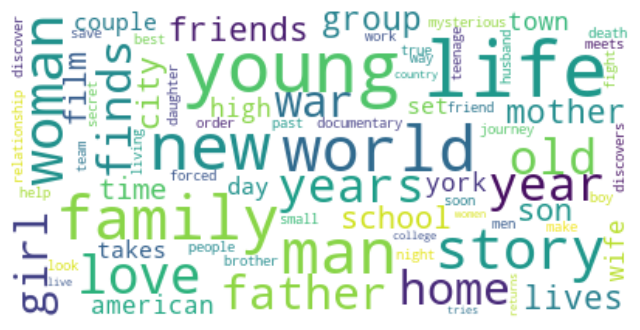

In [522]:
get_bar_vis_text_data(df,"description")
get_wordcloud_vis_text_data(df,"description")

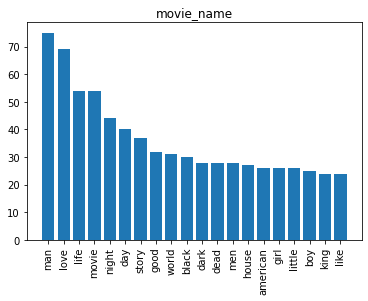

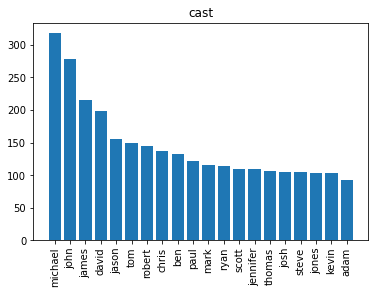

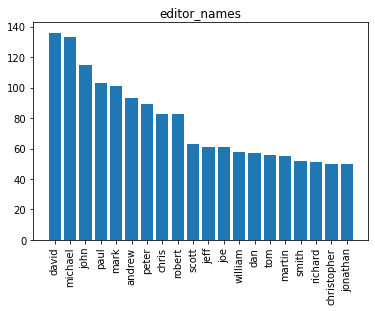

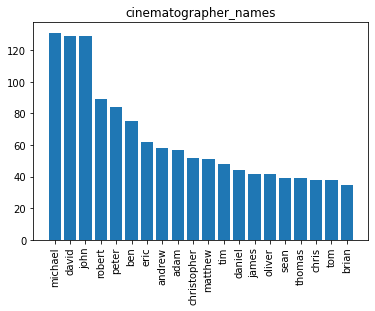

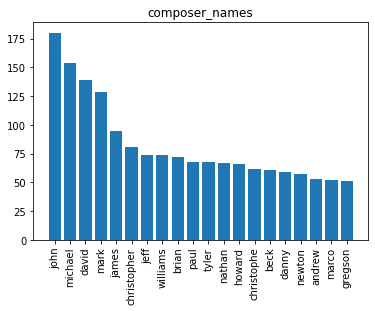

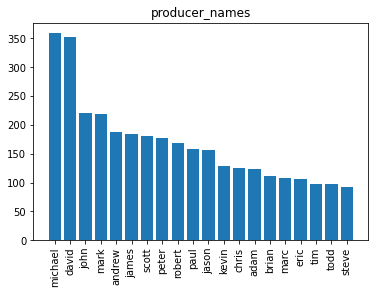

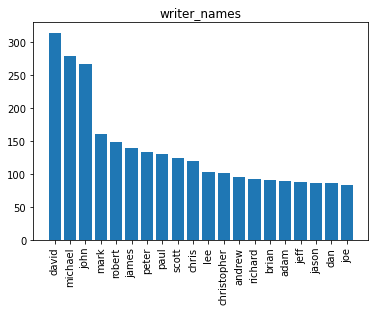

In [523]:
get_bar_vis_text_data(df,"movie_name")
get_bar_vis_text_data(df,"cast")
get_bar_vis_text_data(df,"editor_names")
get_bar_vis_text_data(df,"cinematographer_names")
get_bar_vis_text_data(df,"composer_names")
get_bar_vis_text_data(df,"producer_names")
get_bar_vis_text_data(df,"writer_names")

After seeing the top 20 words in the description column, We will try to understand whether there is a connection between the use of this word in the description of the film and the amount of income.<br>
For this purpose, we created a function that for each word adds a column and sums up the number of occurrences per word in the movie description

Then we examined the correlation and it can be seen that there is no close relationship between the common words and income
Nevertheless, we will try to use this data in order to see if it has an impact on income prediction.

In [524]:
val,new_list = get_table_with_top_values_coll(df,"description"," ")

In [525]:
val[new_list].corr()["worldwide_income"]

life               -0.058598
young              -0.041230
new                 0.073826
man                -0.044212
world               0.042317
family              0.002284
story              -0.057616
woman              -0.036601
love               -0.028502
old                -0.003773
years              -0.030748
year               -0.022765
year               -0.024544
home               -0.008350
father             -0.013535
finds              -0.012813
war                 0.002460
girl               -0.036250
group              -0.005502
friends             0.014404
worldwide_income    1.000000
Name: worldwide_income, dtype: float64

# Step 4 - Advanced Data Analysis - Machine Learning
We will examine a model of linear regression on different tables in order to find the appropriate model to answer the research question.</br>
Since we have done a lot of manipulations on our table we will use a dedicated function that performs everything we did above except deleting the exceptional values and splitting the description column.
Next we will look at using these manipulations to optimize our models, but for now we will initialize the data

In [526]:
df = get_cleaning_data()

In order to run a model of linear regression one must make sure that there are no NULL values,
With the help of the INFO function it can be seen that there are now many Null cels in the table so we will only select the columns we find that there is a connection between them and the object of the study, and of course we will delete cells with missing information

In [527]:
df.isna().sum()

movie_name                      0
movie_link                      0
year                            0
description                     8
genres                          0
running_time                    9
earliest_release_date           0
mpaa                         1463
budget                       3791
preformence                     0
num_of_countries                0
cast                           55
director_names                 56
director_sum                   55
writer_names                  306
writer_sum                     55
producer_names                129
producer_sum                   55
composer_names                524
composer_sum                   55
cinematographer_names         294
cinematographer_sum            55
editor_names                  157
editor_sum                     55
production_designer_names    1003
production_designer_sum        55
domestic_income               599
domestic_percent              635
international_income          918
international_

### First model
We will mark the columns we want to delete as well as the columns that are deleted in a row if missing cells are found
First we will run the model without the **MPAA** column, later we will try to run with it (although this significantly reduces the amount of data)</br>
We will then run the **get_ml_df()** function which deletes the columns and clears missing rows as well as returns a table with numeric data only

In [528]:
cols = ['international_income','international_percent','domestic_income','domestic_percent','mpaa' ,'mpaa_cat']
rows = ['writer_sum','running_time']
df_test_1 = get_ml_df(df,rows,cols)

We will make sure that there are no missing cells and <u>all</u> the columns are numeric

In [529]:
df_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5279 entries, 1 to 5482
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     5279 non-null   int64  
 1   running_time             5279 non-null   float64
 2   num_of_countries         5279 non-null   float64
 3   director_sum             5279 non-null   float64
 4   writer_sum               5279 non-null   float64
 5   producer_sum             5279 non-null   float64
 6   composer_sum             5279 non-null   float64
 7   cinematographer_sum      5279 non-null   float64
 8   editor_sum               5279 non-null   float64
 9   production_designer_sum  5279 non-null   float64
 10  worldwide_income         5279 non-null   float64
 11  Documentary              5279 non-null   int64  
 12  Short                    5279 non-null   int64  
 13  Drama                    5279 non-null   int64  
 14  Horror                  

We will split the dataset into 2 separate tables
- train
- test

Also we will remove the income column that we want to predict for each dataset

In [534]:
train, test = split_table_to_train_and_test(df_test_1)
X_train, y_train = split_dataset(train,'worldwide_income')
X_test, y_test = split_dataset(test,'worldwide_income')

The moment of truth has arrived :)
Now we can train our first linear regression model!

In [535]:
trained_mode = train_model(X_train, y_train)

We will use the model to examine the dataset we have assigned to the test

In [536]:
pred_vals = predict(trained_mode, X_test)

We will evaluate our model using R2 value calculation.</br>
**0.4>R2**</br>
This is definitely a great result relative to the first model!

In [537]:
y_pred= pd.Series(pred_vals,index=X_test.index)
eval_res = evaluate_performance(y_test, y_pred)
eval_res

0.43926053989546743

### Second model
We will now examine whether the **MPAA** column improves our model

In [538]:
df = get_cleaning_data()
df = delete_missing_lines(df,['mpaa'])
cols = ['international_income','international_percent','domestic_income','domestic_percent']
df_test_2 = get_ml_df(df,rows,cols)

Excellent!
We slightly improved the result

In [539]:
calculate_lr_R2(df_test_2,'worldwide_income')

0.47173398742904005

### Third model
We will now try to add to the model the manipulation we showed on the **description** column

In [557]:
rows = ['writer_sum','running_time','description','mpaa']
df = get_cleaning_data()
df = delete_col_by_name(df,cols)
df = delete_missing_lines(df,rows)    
val,new_list = get_table_with_top_values_coll(df,"description"," ")
val = delete_col_by_name(val,['worldwide_income','year'])
df[val.columns] = val

In [584]:
df_test_3 = get_ml_df(df,rows,None)

Excellent!</br>
We have found that this information also helps to improve the model

In [585]:
calculate_lr_R2(df_test_3,'worldwide_income')

0.500196243838873

# Conclusion:
There is a lot more to do, but time is limited and we are not short on courses :)</br>
We can continue to delve into the data and make more complex visualizations and of course try to import missing information and add to the existing dataset.

When we approached the project based mainly on the film budget, but once we finished pulling out the information we realized that this is an information gap that will be complex to bridge and yet the use of data such as genres, description, film time etc.. proved to be very effective, our R2 score get's more then 0.5! So consequently, it was worth the complexity.

If you have come this far, we would love to hear feedback that will help us learn and draw conclusions for the next project in this fascinating field.